<a href="https://colab.research.google.com/github/DarinaVel/Course/blob/master/Copy_of_Course_1_Part_4_Lesson_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# продолжаем Hello World, пример компьютерного зрения
В предыдущем упражнении вы увидели, как создать нейронную сеть, которая выяснила проблему, которую вы пытались решить. Она показала пример явного обученного поведения. Конечно, в том случае это было немного излишним, потому что было бы проще написать функцию Y = 2x-1 напрямую, вместо того, чтобы пытаться использовать машинное обучение для изучения отношений между X и Y для фиксированного набора значений и расширения его на все значения.

Но как насчет сценария, в котором написание подобных правил намного сложнее - например, проблемы с компьютерным зрением? Давайте посмотрим на сценарий, в котором мы можем распознать различные предметы одежды, обученные из набора данных, содержащего 10 различных типов.

## Начало программирования

Начнем с нашего импорта TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

1.15.0-rc3


Данные Fashion MNIST доступны непосредственно в API наборов данных tf.keras. Вы загружаете их как здесь:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Вызов load_data для этого объекта даст вам два набора из двух списков, это будут обучающие и тестовые данные картинок, содержащих предметы одежды и их метки.

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Как выглядят эти значения? Давайте выведем картинку и ее метку из обучающего набора, чтобы посмотреть.
Поэкспериментируйте с различными индексами в массиве. Например, взгляните также на индекс 42


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2 

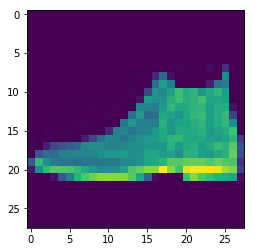

In [4]:
import matplotlib.pyplot as plt
plt.imshow(test_images[0])
print(test_labels[0])
print(test_images[0])

Вы заметите, что все значения в числе находятся в диапазоне от 0 до 255. Если мы обучаем нейронную сеть, по разным причинам будет проще, если мы будем рассматривать все значения в диапазоне от 0 до 1, известный нам процесс **нормализация**. И, благодаря векторизации, в Python такой список легко нормализовать без циклов. Вы делаете это так:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Теперь вам может быть интересно, почему тут 2 комплекта: обучение и тестирование - помните, мы говорили об этом во вступлении? 
Идея состоит в том, чтобы иметь 1 набор данных для обучения, а затем еще один набор данных, которого модель еще не видела ... чтобы увидеть, насколько хороша она будет в классификации значений. В конце концов, когда вы закончите, вы захотите попробовать это с данными, которые раньше не видели!

Давайте теперь соберем модель. Здесь довольно много новых понятий, но не волнуйтесь, вы их освоите.

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential** - определяет ПОСЛЕДОВАТЕЛЬНОСТЬ слоев в нейронной сети

**Flatten** - Помните, наши изображения были квадратными, когда вы их распечатывали? Flatten просто берет этот квадрат и превращает его в одномерный вектор.

**Dense** - Добавляет слой нейронов

Каждому слою нейронов требуется  **activation function**, чтобы сообщить им, что делать. Есть много вариантов, но сейчас просто используйте эти.

**Relu** Фактически означает «если X>0 - возвращает X, иначе возвращает 0» - всё, что  делает эта функция активации - только передает те значения, которые больше нуля на следующий уровень в сети.

**Softmax** - берет набор значений и фактически выбирает самое большое, поэтому, например, если выходные данные последнего слоя выглядят как [0,1, 0,1, 0,05, 0,1, 9,5, 0,1, 0,05, 0,05, 0,05], то после Softmax результат будет таким: [0,0,0,0,1,0,0,0,0] - цель - сэкономить много кода!

Теперь, когда модель определена, следующее, что нужно сделать - создать ее. Вы делаете это, компилируя ее с указанием оптимизатора и функции потерь, как и раньше, а затем тренируете посредством метода **model.fit**, который сопоставит ваши тренировочные данные меткам обучения - то есть, выявит взаимосвязи между обучающими данными и их фактическими метками. И в будущем, если у вас есть данные, которые похожи на обучающие данные, то модель может их классифицировать.

In [7]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4941 - acc: 0.8247
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3722 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3322 - acc: 0.8782
Epoch 4/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3100 - acc: 0.8855
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2904 - acc: 0.8929


Как только вы закончите тренировку - вы увидите значение точности в конце финальной эпохи. Она может выглядеть примерно как 0,9098. Это говорит о том, что ваша нейронная сеть на 91% точна в классификации тренировочных данных. То есть, она выяснила  шаблон совпадения между изображением и надписями, который работает в 91% случаев. Не здорово, но неплохо, учитывая, что она была тренирована только 5 эпох и закончила довольно быстро.
Но как она будет работать с новыми данными? Вот для чего у нас есть тестовые изображения. Мы можем вызвать метод **model.evaluate**, с двумя приготовленными тестовыми наборами, и он сообщит нам об ошибке для каждой пары вектор-метка. Давайте попробуем:


In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3645 - acc: 0.8690


[0.3644561621785164, 0.869]

Мне  показало точность около 0,8838, что означает около 88%. Как и ожидалось, модель, вероятно, не будет так хороша с *незнакомыми* данными, как она была с данными, на которых была обучена! Проходя этот курс, вы будете искать способы улучшить ее.

Чтобы узнать больше, попробуйте следующие упражнения:

# Исследовательские упражнения

###Упражнение 1:
Запустите приведенный ниже код: он классифицирует каждое изображение из тестового набора, а затем печатает первую запись. Вывод метода **model.predict** - это список чисел. Как вы думаете, почему это так, и что представляют собой эти цифры?

In [9]:
classifications = model.predict(test_images)

print(classifications[0])

[5.5038083e-07 7.7225003e-08 3.8026219e-06 1.1930431e-06 2.2218392e-06
 1.4544085e-03 4.7618842e-06 3.6073010e-02 1.1149858e-05 9.6244884e-01]


Подсказка: попробуйте вывести значение (test_labels [0]) - и вы получите 9. Это поможет вам понять, почему этот список выглядит так, как он выглядит.

In [10]:
print(test_labels[0])

9


На следующие вопросы необходимо ответить [в лекции](http://moodle.asu.edu.ru/mod/lesson/view.php?id=74147&pageid=1625)
###  Вопрос 1. Что представляет собой этот список?




### Вопрос 2. Как вы узнали из этого списка, что предмет - ботинок?





##Упражнение 2:
Давайте теперь посмотрим на слои в вашей модели. Экспериментируйте с различными значениями для слоя с 512 нейронами. Какие разные результаты вы получаете для Loss, времени тренировки и т.д.? Как вы думаете, почему?



In [11]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0-rc3
11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 250us/sample - loss: 0.1863
Epoch 2/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0749
Epoch 3/5
60000/60000 [==============================] - 15s 243us/sample - loss: 0.0471
Epoch 4/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0340
Epoch 5/5
10000/10000 [==============================] - 1s 102us/sample - loss: 0.0685
[6.1148842e-09 2.5392909e-08 2.0338616e-08 1.2911693e-05 1.5519286e-13
 8.4710815e-11 1.1122753e-11 9.9998701e-01 2.1595430e-10 7.4157555e-08]
7


###Вопрос 3. Увеличьте количество нейронов в слое до 1024. Как это повлияет на время обучения и точность?


##Упражнение 3: 

Что произойдет, если вы удалите слой Flatten()? Почему вы думаете, что это так?

Вы получаете ошибку о форме данных. Это подтверждает практическое правило, что первый слой в вашей сети должен иметь ту же форму, что и ваши данные. Изначально наши данные представляют собой изображения 28x28, и 28 слоев из 28 нейронов были бы неосуществимы, поэтому имеет смысл «расплющить» эти квадраты 28 х 28 в строки 784x1. Вместо того, чтобы писать код для такой обработки, мы добавляем слой Flatten() в начале, и когда потом массивы загружаются в модель, они автоматически вытягиваются для нас в вектор.


In [12]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0-rc3
Train on 60000 samples
Epoch 1/5


InvalidArgumentError: ignored

##Упражнение 4:
Рассмотрим финальные (выходные) слои. Почему их 10? Что произойдет, если бы у вас было количество, отличное от 10? Например, попробуйте тренировать сеть с 5

Вы получаете сообщение об ошибке, как только оно находит неожиданное значение. Еще одно практическое правило - количество нейронов в последнем слое должно соответствовать количеству классов, на которые вы классифицируете. В данном случае это цифры 0-9, поэтому их 10, поэтому в последнем слое должно быть 10 нейронов


In [13]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0-rc3
Train on 60000 samples
Epoch 1/5


InvalidArgumentError: ignored

##Упражнение 5:

Рассмотрим влияние дополнительных слоев в сети. Что произойдет, если вы добавите еще один слой между слоем с 512 и последним слоем с 10.

Ответ: Это не оказывает существенного влияния, потому что это относительно простые данные. Для гораздо более сложных данных (включая цветные изображения, на которых нужно классифицировать цветы, которые вы увидите на следующем уроке), часто необходимы дополнительные слои.

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0-rc3
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 222us/sample - loss: 0.1829
Epoch 2/5
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0807
Epoch 3/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0564
Epoch 4/5
60000/60000 [==============================] - 14s 225us/sample - loss: 0.0416
Epoch 5/5
10000/10000 [==============================] - 1s 99us/sample - loss: 0.0754
[1.11150915e-11 6.96973090e-10 5.67605944e-08 5.23195132e-09
 8.12273155e-13 1.06071671e-11 4.02686714e-14 9.99999881e-01
 6.88530569e-12 6.26558077e-08]
7


##Упражнение 6:
Рассмотрим влияние обучения для большего или меньшего числа эпох. Как вы думаете, почему это так?

Попробуйте 15 эпох - вы, вероятно, получите модель с гораздо лучшим Loss, чем модель с 5
Попробуйте 30 эпох - вы можете увидеть, что значение потерь перестает уменьшаться, а иногда и увеличивается. Это побочный эффект, называемого «overfitting» или переобучение, за которым нужно следить при обучении нейронных сетей. Нет смысла тратить время на тренировки, если вы не улучшаете свои потери.


In [15]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

1.15.0-rc3
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2549
Epoch 2/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1119
Epoch 3/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0765
Epoch 4/30
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0572
Epoch 5/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0450
Epoch 6/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0336
Epoch 7/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0274
Epoch 8/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0226
Epoch 9/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0189
Epoch 10/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0151
Epoch 11/30
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0

##Упражнение 7:

Перед тренировкой вы нормализовали данные, перейдя от значений 0-255 к значениям 0-1. Как повлияет удаление нормализации? Вот полный код, чтобы попробовать. Как вы думаете, почему получаются разные результаты? Ответьте несколькими предложениями в лекции.

In [20]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/1.0
test_images=test_images/1.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.15.0-rc3
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 165us/sample - loss: 2.7759 - acc: 0.9059
Epoch 2/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.3329 - acc: 0.9382
Epoch 3/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2989 - acc: 0.9413
Epoch 4/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2757 - acc: 0.9452
Epoch 5/5
10000/10000 [==============================] - 1s 87us/sample - loss: 0.3458 - acc: 0.9435
[0.0000000e+00 2.1740563e-18 9.4643328e-26 1.2476242e-15 5.4874043e-27
 7.4531838e-36 0.0000000e+00 1.0000000e+00 3.3315732e-32 2.6247717e-20]
7


##Упражнение 8:
Ранее, во время тренировки с дополнительными эпохами, возникла проблема, из-за которой значение Loss могло ухудшиться. Возможно, это заняло некоторое лишнее время, и вы, возможно, подумали: «Разве не было бы хорошо, если бы я мог остановить обучение, когда достигну желаемого значения?» - то есть 95% точности может быть достаточно для вас, и если вы достигнете этого после 3 эпох, зачем сидеть сложа руки в ожидании, пока завершится большое количество эпох.
Так как бы вы это исправили? Как и в любой другой программе - у вас есть callback! Посмотрим на них в действии:

In [18]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




1.15.0-rc3
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 154us/sample - loss: 0.4761
Epoch 2/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.3605
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3605
